In [42]:
from corpus import read_paper_corpus
from word_scoring import smi, tf, tf_idf, dsmi, pmi
from itertools import chain
from tokenizer import tokenize_sentences_and_words

item = read_paper_corpus()[0]

paper-corpus: 100%|██████████| 50/50 [00:00<00:00, 5840.51it/s]


In [45]:
def normalize(word_dict):
    max_val = max(word_dict.values())
    for key in word_dict:
        word_dict[key] /= max_val

abstract, introduction, middle, conclusion = item

abstract_sentences_tokens = tokenize_sentences_and_words(abstract, remove_stop=True)
introduction_sentences_tokens = tokenize_sentences_and_words(introduction, remove_stop=False)
middle_sentences_tokens = tokenize_sentences_and_words(middle, remove_stop=False)
conclusion_sentences_tokens = tokenize_sentences_and_words(conclusion, remove_stop=False)

smi_dict = smi(
    list(chain(*(introduction_sentences_tokens + conclusion_sentences_tokens))),
    list(chain(*middle_sentences_tokens)),
    lamda=0.3,
    normalize=False
)
normalize(smi_dict)

dsmi_dict = dsmi(
    list(chain(*(introduction_sentences_tokens + conclusion_sentences_tokens))),
    list(chain(*middle_sentences_tokens)),
    lamda=0.3
)
normalize(dsmi_dict)

tf_dict = tf(list(chain(
    *(introduction_sentences_tokens + middle_sentences_tokens + conclusion_sentences_tokens)
)))
normalize(tf_dict)

idf_dict = tf_idf(list(chain(
    *(introduction_sentences_tokens + middle_sentences_tokens + conclusion_sentences_tokens)
)))
normalize(idf_dict)

pmi_dict = pmi(
    list(chain(*(introduction_sentences_tokens + conclusion_sentences_tokens))),
    list(chain(*middle_sentences_tokens)),
)
normalize(pmi_dict)

In [3]:
word_sequence = []
for tokens in tokenize_sentences_and_words(introduction + middle + conclusion, remove_stop=False):
    for token in tokens:
        if token not in word_sequence:
            word_sequence.append(token)


In [4]:
word_sequence = word_sequence[:900]

In [5]:
def plot_dict(score_dict, word_sequence):
    score_sequence = [score_dict[token] for token in word_sequence]
    import numpy as np
    import matplotlib.pyplot as plt

    # x = np.random.rand(100).reshape(10,10)
    x = np.array(score_sequence).reshape(30, 30)
    plt.imshow(x, cmap=plt.cm.hot, vmin=0, vmax=1)
    plt.colorbar()
    plt.show()

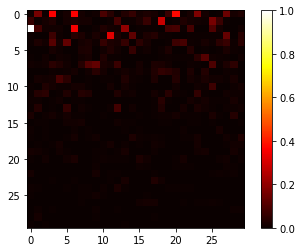

In [47]:
plot_dict(tf_dict, word_sequence)

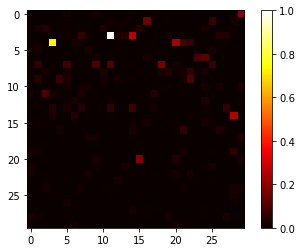

In [48]:
plot_dict(idf_dict, word_sequence)

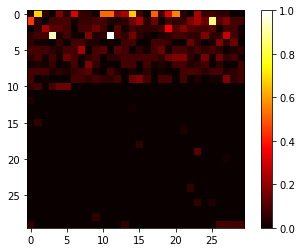

In [46]:
plot_dict(smi_dict, word_sequence)

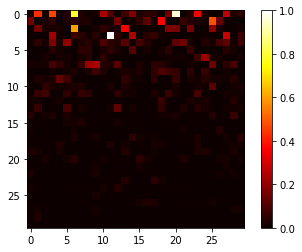

In [50]:
plot_dict(dsmi_dict, word_sequence)

In [55]:
from summarizers import SLN_summarizer

sents, iteration = SLN_summarizer(introduction_sentences_tokens + middle_sentences_tokens + conclusion_sentences_tokens, smi_dict, strategies=["concise", "diverse", "coherent"])

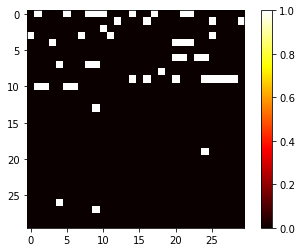

In [66]:
abstract_tokens = []
for tokens in abstract_sentences_tokens:
    abstract_tokens.extend(tokens)

abstract_dict = {
    token : (1 if token in abstract_tokens else 0)
    for token in word_sequence
}

plot_dict(abstract_dict, word_sequence)

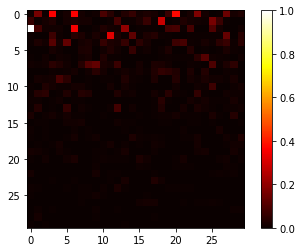

In [67]:
plot_dict(tf_dict, word_sequence)